In [16]:
import pandas as pd
xg_df = pd.read_csv('xg_vs_lig_basarisi.csv')
xg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sezon          10 non-null     object 
 1   Takım          10 non-null     object 
 2   Oynanan Maç    10 non-null     int64  
 3   xG (For)       10 non-null     float64
 4   xGA (Against)  10 non-null     float64
 5   Puan           10 non-null     int64  
 6   Sıralama       10 non-null     int64  
 7   Gol Sayısı     10 non-null     int64  
 8   Yediği Gol     10 non-null     int64  
 9   xG Farkı       10 non-null     float64
 10  xG Oranı       10 non-null     float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1012.0+ bytes


In [18]:
xg_df.head(8)

,Sezon,Takım,Oynanan Maç,xG (For),xGA (Against),Puan,Sıralama,Gol Sayısı,Yediği Gol,xG Farkı,xG Oranı
0,2023/24,Manchester City,38,85.6,32.4,89,1,94,33,53.2,2.641975
1,2023/24,Arsenal,38,78.1,35.0,84,2,88,36,43.1,2.231429
2,2023/24,Liverpool,38,75.3,37.5,82,3,85,39,37.8,2.008000
3,2023/24,Tottenham,38,68.7,42.1,70,4,74,45,26.6,1.631829
4,2023/24,Chelsea,38,64.2,45.3,65,5,70,48,18.9,1.417219
5,2023/24,Manchester United,38,62.5,47.6,62,6,67,50,14.9,1.313025
6,2023/24,Newcastle,38,60.9,44.0,61,7,65,47,16.9,1.384091
7,2023/24,Brighton,38,59.1,49.2,59,8,63,52,9.9,1.201220


In [19]:
categoric_columns=xg_df.select_dtypes('object').columns.tolist()
categoric_columns

['Sezon', 'Takım']

In [20]:
categoric_columns = ['Sezon', 'Takım']

for column in categoric_columns:
    print(column, xg_df[column].unique())
    print("-----")

Sezon ['2023/24']
-----
Takım ['Manchester City' 'Arsenal' 'Liverpool' 'Tottenham' 'Chelsea'
 'Manchester United' 'Newcastle' 'Brighton' 'Aston Villa' 'West Ham']
-----


In [21]:
xg_df.duplicated().any()
xg_df[xg_df.duplicated(keep=False) == True].sort_values(by=["Takım"])
xg_df.drop_duplicates(inplace=True)
xg_df.duplicated().any()


np.False_

In [22]:
xg_df[xg_df.duplicated(keep=False)==True].sort_values(by=["Takım"])

,Sezon,Takım,Oynanan Maç,xG (For),xGA (Against),Puan,Sıralama,Gol Sayısı,Yediği Gol,xG Farkı,xG Oranı


<Axes: >

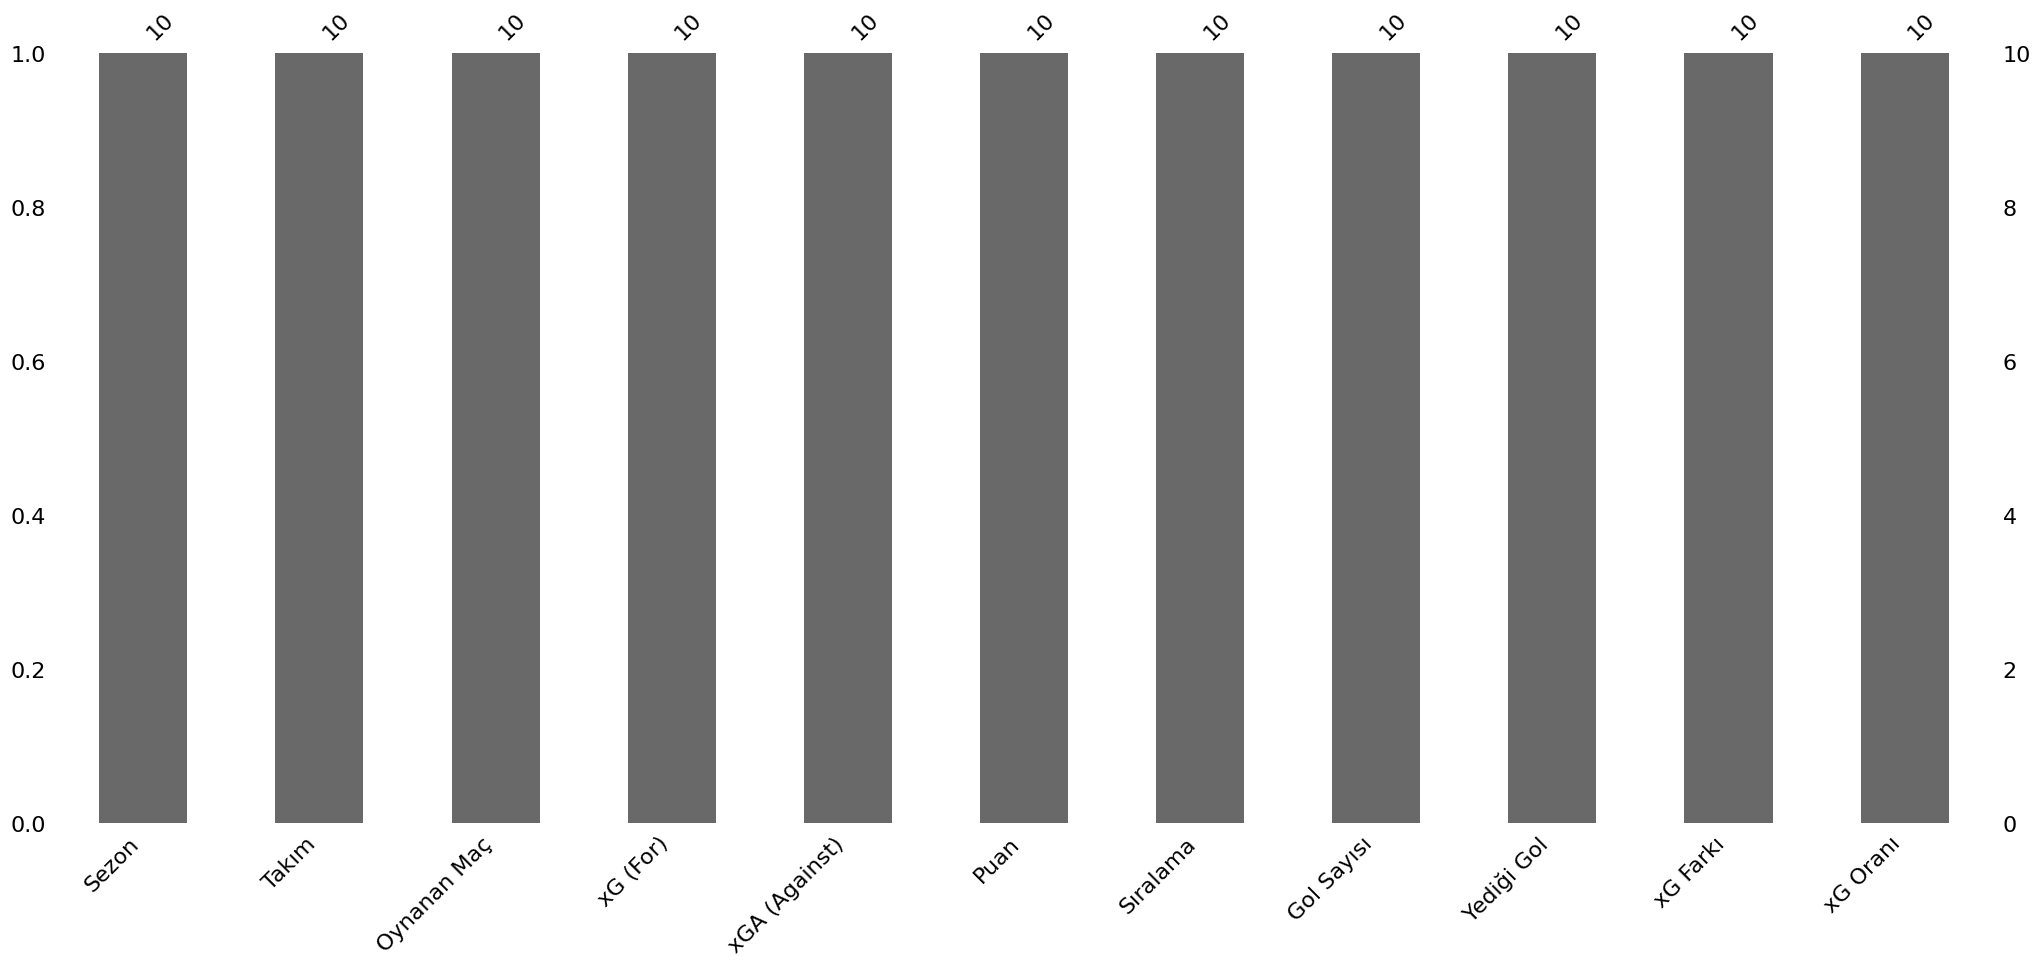

In [ ]:
import missingno as mso
mso.bar(xg_df)

In [ ]:
xg_df.isnull().sum()

,0
Sezon,0
Takım,0
Oynanan Maç,0
xG (For),0
xGA (Against),0
Puan,0
Sıralama,0
Gol Sayısı,0
Yediği Gol,0
xG Farkı,0


In [ ]:
import matplotlib.pyplot as plt
continous_column=xg_df.select_dtypes('int64').columns.tolist()
continous_column

['Oynanan Maç', 'Puan', 'Sıralama', 'Gol Sayısı', 'Yediği Gol']

Oynanan Maç


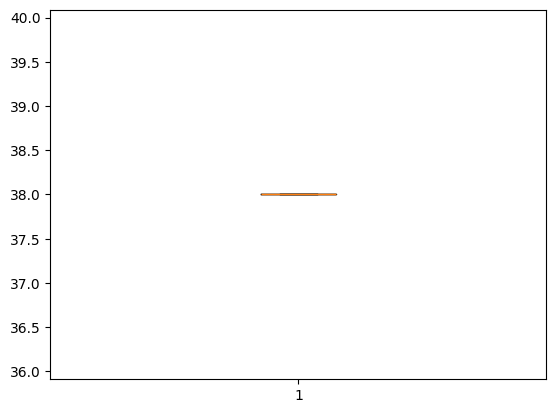

Puan


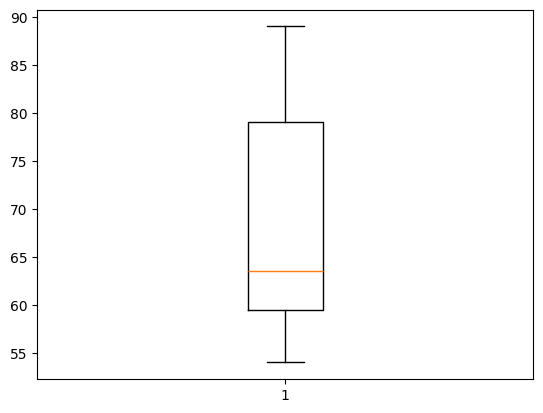

Sıralama


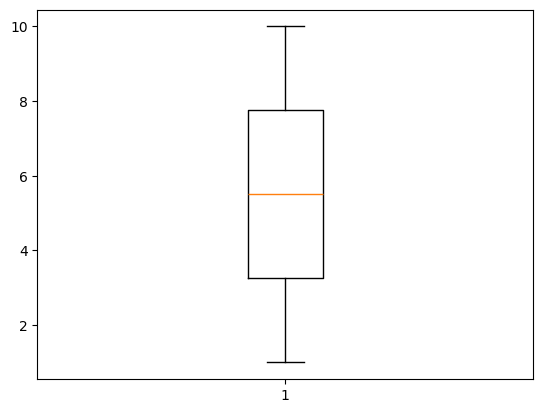

Gol Sayısı


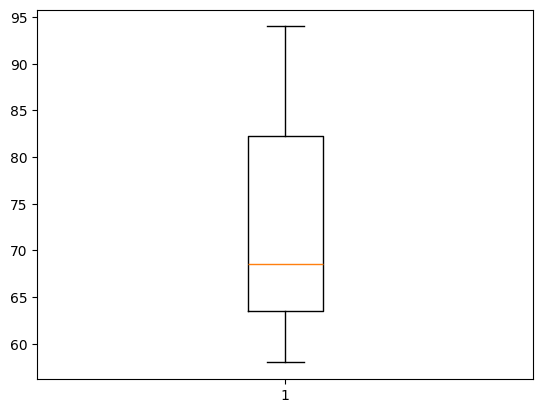

Yediği Gol


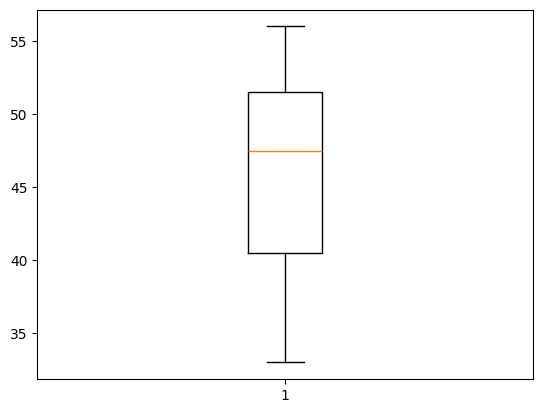

In [ ]:
for column in continous_column:
  print(column)
  plt.boxplot(xg_df[column])
  plt.show()

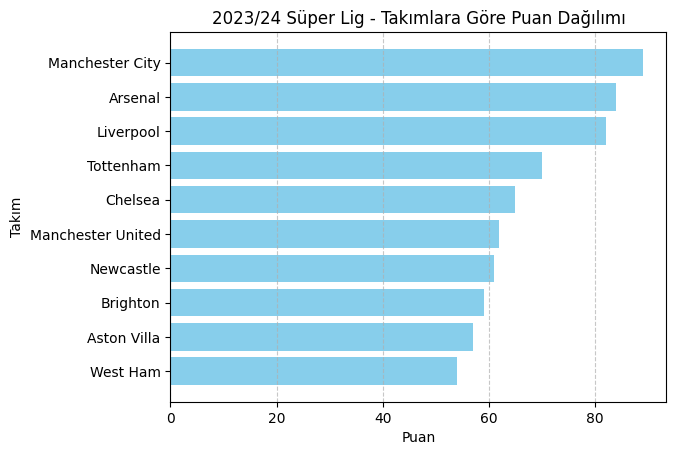

In [ ]:
plt.barh(xg_df['Takım'], xg_df['Puan'], color='skyblue')
plt.title('2023/24 Süper Lig - Takımlara Göre Puan Dağılımı')
plt.xlabel('Puan'); plt.ylabel('Takım')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


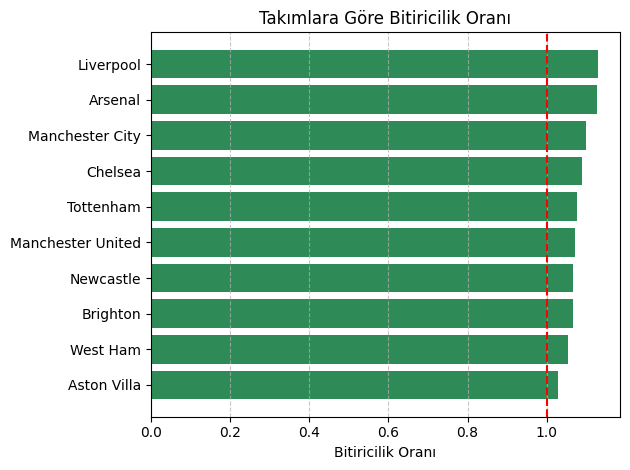

In [ ]:
xg_df["Bitiricilik Oranı"] = xg_df["Gol Sayısı"] / xg_df["xG (For)"]
df = xg_df[["Takım", "Bitiricilik Oranı"]].sort_values(by="Bitiricilik Oranı", ascending=False)

plt.barh(df["Takım"], df["Bitiricilik Oranı"], color="seagreen")
plt.axvline(1.0, color="red", linestyle="--")
plt.xlabel("Bitiricilik Oranı")
plt.title("Takımlara Göre Bitiricilik Oranı")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



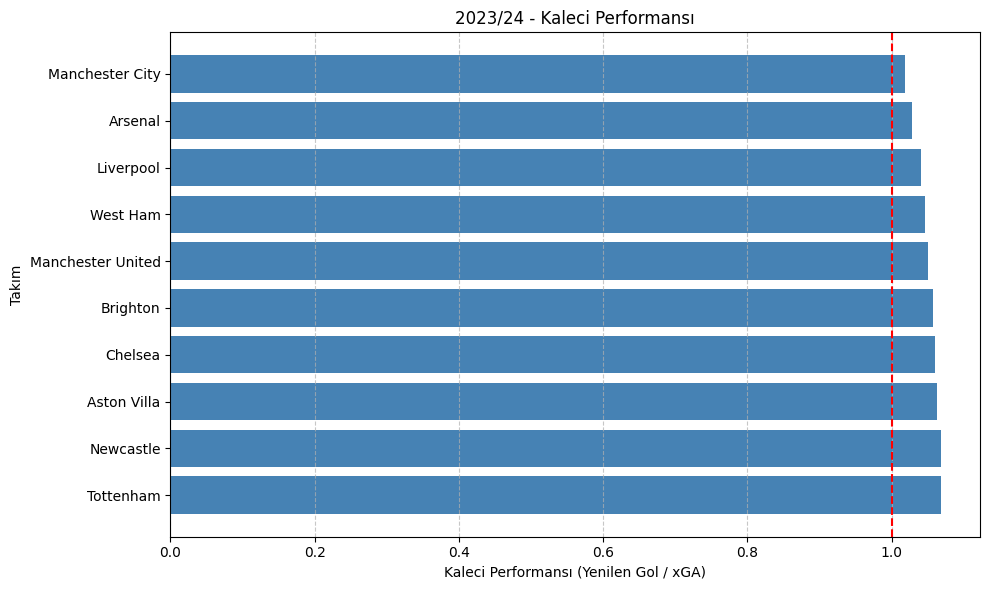

In [ ]:
xg_df["Kaleci Performansı"] = xg_df["Yediği Gol"] / xg_df["xGA (Against)"]
df = xg_df[["Takım", "Kaleci Performansı"]].sort_values(by="Kaleci Performansı")

plt.figure(figsize=(10, 6))
plt.barh(df["Takım"], df["Kaleci Performansı"], color='steelblue')
plt.axvline(1.0, color='red', linestyle='--')
plt.xlabel("Kaleci Performansı (Yenilen Gol / xGA)")
plt.ylabel("Takım")
plt.title("2023/24 - Kaleci Performansı")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


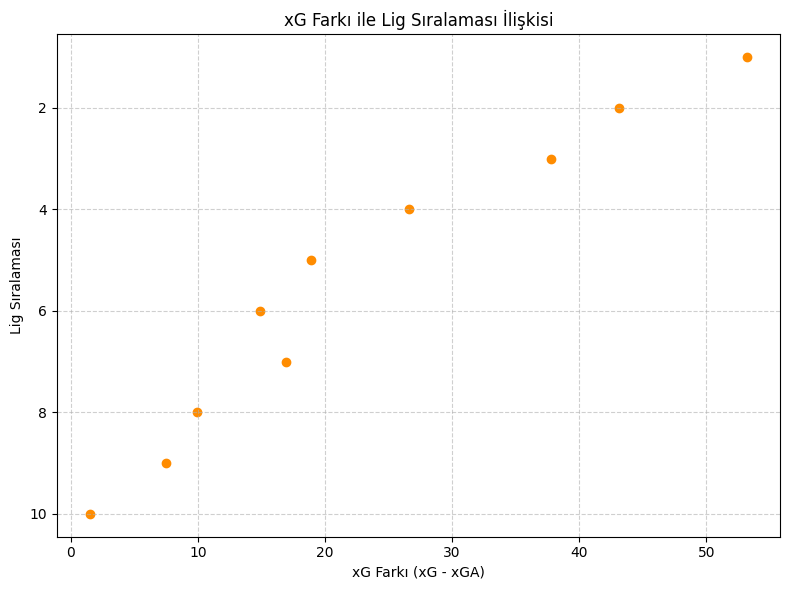

In [ ]:
xg_df["xG Farkı"] = xg_df["xG (For)"] - xg_df["xGA (Against)"]

plt.figure(figsize=(8, 6))
plt.scatter(xg_df["xG Farkı"], xg_df["Sıralama"], color='darkorange')
plt.gca().invert_yaxis()
plt.xlabel("xG Farkı (xG - xGA)")
plt.ylabel("Lig Sıralaması")
plt.title("xG Farkı ile Lig Sıralaması İlişkisi")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


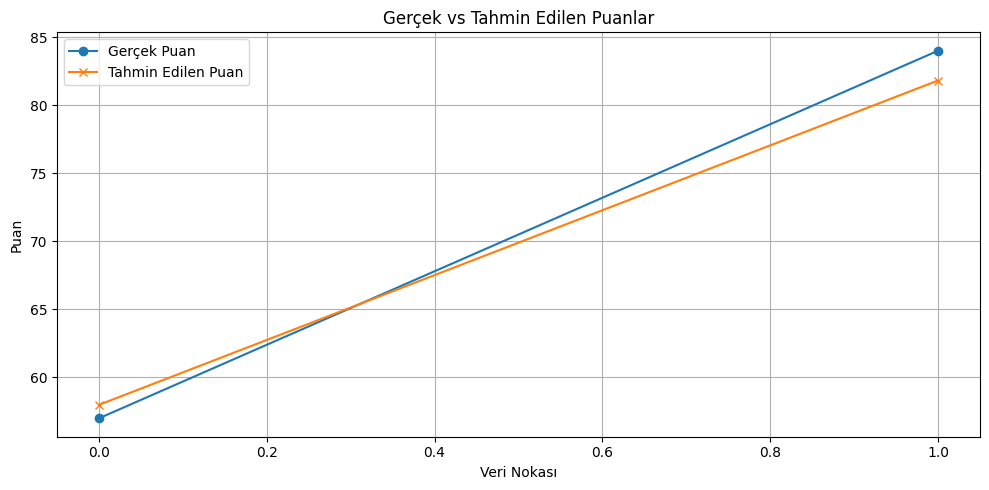

In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("xg_vs_lig_basarisi.csv")


X = df[["xG (For)"]]
y = df["Puan"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test.values, label="Gerçek Puan", marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label="Tahmin Edilen Puan", marker='x')
plt.title("Gerçek vs Tahmin Edilen Puanlar")
plt.xlabel("Veri Nokası")
plt.ylabel("Puan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



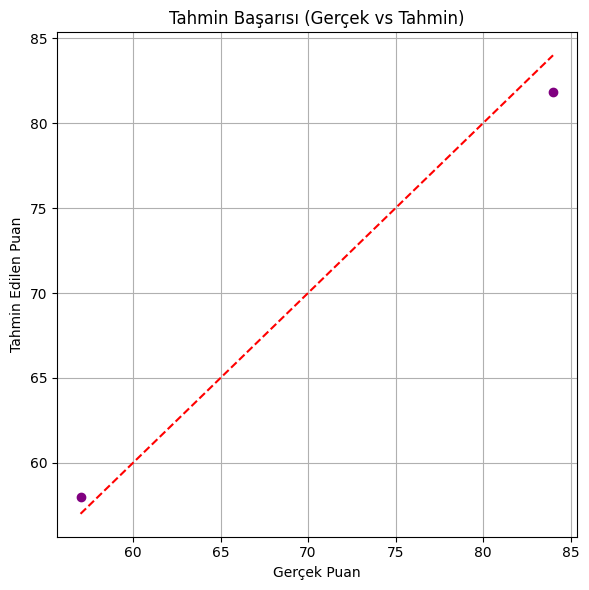

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek Puan")
plt.ylabel("Tahmin Edilen Puan")
plt.title("Tahmin Başarısı (Gerçek vs Tahmin)")
plt.grid(True)
plt.tight_layout()
plt.show()
